The Pebble Game

Let's imagine right now, that rather than being on this zoom call we were all transported to the beaches of Monte Carlo. You can see it now, can't you? The beautiful clear blue sky and crystal clear water, and maybe even a cold brew. All of a sudden someone in the group has an idea... All excited, he/she grabs a stick and quickly draws a large square in the sand, and this person have a keen eye for measurements makes each side 2 meters.... The person says 'lets play a game...' OKay so we're going to play a game, a geeky game, but a game nonetheless. The game that's proposed, let's call it the 'pebble game', asks if we estimate the value of $\pi$ by randomly throwing pebbles into the circle inscribed square in the sand? The rules of the game are - Pebbles are randomly thrown into the enclosed area (let's blindfold the guinea pig). The ratio of stones in the circle and the total number of thrown stones is a simple or direct sampling statistical estimate for the area of the pond.


Let there be a circle with radius 1 and centre (0,0).

Surrounding the circle is a square with sides of length 2.
<br>

\begin{align}
A_{circle} = \pi r^2 \\
\pi = \frac{A_{circle}}{r^2} \tag{1}\\
A_{square} = (2r)^2 = 4r^2\\
r=\sqrt{\frac{A_{square}}{4}} \tag{2}\\
\text{substitute eq. 4 into eq. 2:}\\
\boxed{\pi = 4\left(\frac{A_{circle}}{A_{square}}\right)} \tag{3}\\
\end{align}


We can estimate the ratio $\frac{A_{circle}}{A_{square}}$ by generating random points
on the plane between (-1, 1). We count the number of points that land
within the circle and the number of points outside the circle.
Then, $\frac{A_{circle}}{A_{square}} \approx \frac{Trials_{\text{hits}}}{Trials_{total}}$.

So, $\pi \approx 4 \cdot \frac{Trials_{\text{hits}}}{Trials_{total}}$

In [35]:

import random
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import Video
from random import choice
import pandas as pd
import math
from IPython.display import display, Math
%matplotlib inline

def MonteCarloSim(num_trials, decimalplaces = 5):
    '''returns dataframe with all the results of num_trials = trials of the Monte Carlo algo'''
    df = pd.DataFrame(columns=['x', 'y', 'r', 'Location', 'piEstimate','Error','Color'])
    df['x'] = 2*(np.random.rand(num_trials)-0.5)
    df['y'] = 2*(np.random.rand(num_trials)-0.5)
    df['r'] = np.sqrt(df['x']**2 + df['y']**2)
    df.loc[df['r'] <= 1, 'Location'] = 'Inside'
    df.loc[df['r'] > 1, 'Location'] = 'Outside'
    df.loc[df['r'] <= 1, 'Color'] = 'green'
    df.loc[df['r'] > 1, 'Color'] = 'red'
    df['piEstimate'] = 4*(df['Location'] == 'Inside').cumsum()/(df.index-1) 
    df['Error'] = 4*(df['Location'] == 'Inside').cumsum()/(df.index-1) - math.pi

    return df

The Function below records each frame prior to throwing a new pebble, then the next frame displays the previous canvas with and additional pebble after the trial. These are strung together to make a movie  

In [43]:
def MonteCarloAnimation(Ntrials):
    data=MonteCarloSim(Ntrials)
    for estimate in data['piEstimate']:
        print(f"current estimate of ")
        display(Math(f" \pi: {estimate}"))
    plt.rcParams['axes.facecolor'] = plt.rcParamsDefault['axes.facecolor']
    plt.rcParams['axes.edgecolor'] = plt.rcParamsDefault['axes.edgecolor']
    plt.rcParams['axes.grid'] = plt.rcParamsDefault['axes.grid']
    plt.rcParams['grid.alpha'] = plt.rcParamsDefault['grid.alpha']
    plt.rcParams['grid.color'] = plt.rcParamsDefault['grid.color']

    circle = plt.Circle((0, 0), 1.0, color='g', linewidth=1, fill=False) ##define circle with built in circle object

    plotfunc = plt.figure(figsize=(10,10))
    plotfunc.subplots_adjust(top=0.8, wspace=0.025)
    plotfunc.tight_layout()

    ax1 = plt.subplot(111, xlim=(-1.0, 1), ylim=(-1.0, 1.0))
    ax1.add_patch(circle)

    scat = ax1.scatter(x=0, y=0, s=70, marker='o')

    # Animation update function
    def animationUpdate(k):
        x=list(data['x'])[:k]
        y = list(data['y'])[:k]
        scat.set_offsets(np.c_[x,y])
        scat.set_color(data['Color'][:k])
        return scat,

    anim = FuncAnimation(plotfunc, animationUpdate, frames=Ntrials, interval=400, blit=True) # function for creating animation

    # Set up formatting for the movie files
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=10, bitrate=10000) #fps (frames per second) determines the speed of the movie
    anim.save('animatedMonteCarlo.mp4', writer=writer)

    Video('animatedMonteCarlo.mp4')

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

current estimate of 


<IPython.core.display.Math object>

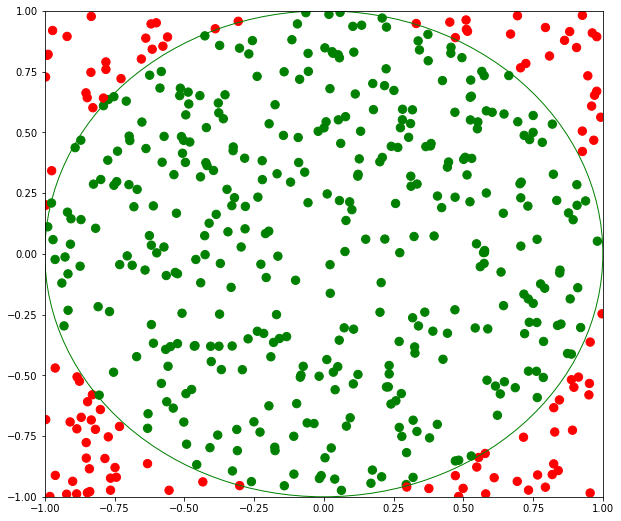

In [44]:
MonteCarloAnimation(500)